<a href="https://colab.research.google.com/github/Jair-RM/Modelacion-Financiera/blob/main/OC_SMF_NeuronasArtificiales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neuronas Artificiales

**Oliver Cuate**

ocuateg@ipn.mx

*13 de febrero de 2025*

---

La neurona artificial es un modelo simplificado de la neurona natural, la cual trata de imitar 3 aspectos principales:

1. La fuerza sináptica que pondera los impulsos recibidos
2. La acumulación de estos impulsos ponderados
3. La activación de la neurona que produce un impulso de respuesta a su salida.


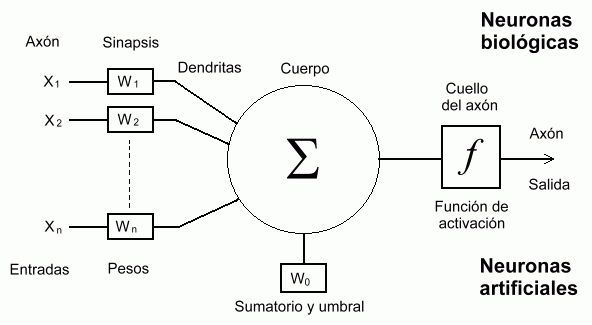

La primera neurona artificial fue la llamada Unidad de Umbral Lineal, propuesta en 1943 por Warren McCulloch y Walter Pitts, la cual presupone que tanto los valores de los atributos de entrada como los valores de salida son binarios.

In [ ]:
# Bibliotecas que se usarán
import numpy as np
import matplotlib.pyplot as plt

## Unidad de Umbral Lineal
La operación que lleva a cabo una neurona articial está dada por la suma pesada evaluada en una función de activación $\phi$. Una de las primeras funciones de activación utilizadas fue la escalón unitario, definida como

$
\phi(z) = \begin{cases} 1, & \text{si } z \geq 0\\0, & \text{en caso contrario}\end{cases}
$

Esta se puede llevar a cabo con la siguiente función de Python:

In [ ]:
def escalon(z):
    if z >= 0.0:
        return 1.0
    else:
        return 0.0

print( escalon(-500) )

0.0


In [ ]:
# función vectorizada
escalon_v = np.vectorize(escalon)
escalon_v([[3,-1],[-5,3]])

array([[1., 0.],
       [0., 1.]])

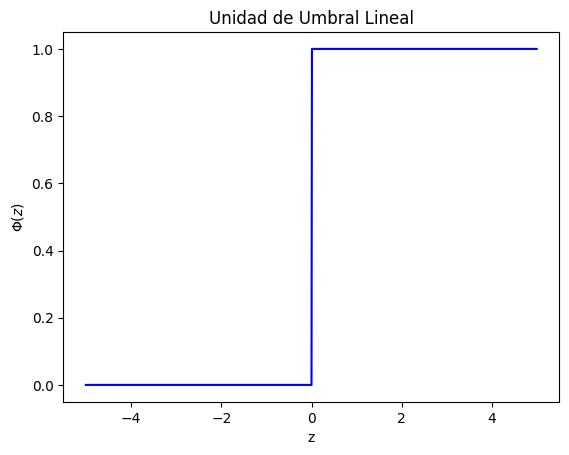

In [ ]:
from matplotlib import legend
# Gráfica de la función
z = np.arange(-5,5,0.01)
v = escalon_v(z)

plt.plot(z,v,'-b')
plt.title('Unidad de Umbral Lineal')
plt.xlabel('z')
plt.ylabel(r'$\Phi(z)$')
plt.show()

Por su parte, la suma pesada simplemente consiste en multiplicar cada entrada por su correspondiente peso y sumarle el sesgo. Esto lo podemos expresar como

$
z = w_1 \cdot x_1 + w_2 \cdot x_2 + \cdots + w_d \cdot x_d + b
$

En su forma vectorial

$
z = \mathbf{w}^T \mathbf{x} + b
$

Para realizar esto en Python, podemos usar la función `dot` de NumPY de la siguiente manera `z = np.dot(w.T, x) + b`. Así, la operación de la neurona completa sería:

In [ ]:
def neurona(x, w, b):
  z = np.dot(w.T, x) + b  # suma pesada
  a = escalon(z)          # función activación

  return a

### OR ($\lor$)
Esta neurona es capaz de aproximar el operador OR, cuya salida es 1 cuando al menos 1 de las 2 entradas es 1:


| $x_1$ | $x_2$ | $y$
| ------------- |:-------------:| -----:|
|0 |0 |0|
|0 |1 |1|
|1 |0 |1|
|1 |1 |1|

La neurona recibe 2 valores binarios como entrada y produce un valor binario como salida. Específicamente, la neurona calcularía

$
\hat{y} = \phi(w_1 \cdot x_1 + w_2 \cdot x_2 + b)
$

Para poder aproximar la operación OR es necesario encontrar los valores apropiados de $w_1$, $w_2$ y $b$. Una posible elección sería 10, 10 y -5 respectivamente. Verifiquemos estos valores:

In [ ]:
X = np.array([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
w = np.array([10, 10]).T
b = -5

print('-----------------------------')
print('x_1 \t x_2 \t y_p')
print('-----------------------------')
for i in range(X.shape[0]):
  y_p = neurona(X[i, :], w, b)
  print('{0} \t{1}\t{2}'.format(X[i, 0], X[i, 1], y_p))

-----------------------------
x_1 	 x_2 	 y_p
-----------------------------
0.0 	0.0	0.0
0.0 	1.0	1.0
1.0 	0.0	1.0
1.0 	1.0	1.0


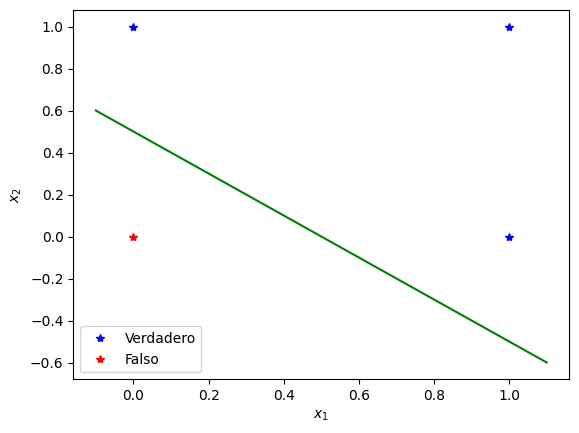

In [ ]:
# de forma gráfica
x1 = np.arange(-0.1, 1.1, 0.1)
x2 = -(w[0]*x1+b)/w[1]
plt.plot([0.0, 1.0, 1.0],[1.0, 0.0, 1.0], '*b', label='Verdadero')
plt.plot([0.0],[0.0], '*r', label='Falso')
plt.plot(x1,x2,'-g')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend()
plt.show()

### AND ($\land$)
De forma similar, podemos aproximar la operación AND:


| $x_1$ | $x_2$ | $y$
| ------------- |:-------------:| -----:|
|0 |0 |0|
|0 |1 |0|
|1 |0 |0|
|1 |1 |1|

Nuevamente, debemos encontrar los valores apropiados para los pesos y el sesgo. Probemos con $w_1 = 10$, $w_2 = 10$ y $b = -15$.

In [ ]:
w = np.array([10, 10]).T
b = -15

print('-----------------------------')
print('x_1 \tx_2 \ty_p')
print('-----------------------------')
for i in range(X.shape[0]):
  y_p = neurona(X[i, :], w, b)
  print('{0} \t {1} \t {2}'.format(X[i, 0], X[i, 1], y_p))

-----------------------------
x_1 	x_2 	y_p
-----------------------------
0.0 	 0.0 	 0.0
0.0 	 1.0 	 0.0
1.0 	 0.0 	 0.0
1.0 	 1.0 	 1.0


In [ ]:
# Graficar

### NAND
También podemos aproximar la negación de la operación AND (NAND):


| $x_1$ | $x_2$ | $y$
| ------------- |:-------------:| -----:|
|0 |0 |1|
|0 |1 |1|
|1 |0 |1|
|1 |1 |0|

En este caso, los valores para los pesos y el sesgo son $w_1 = -10$, $w_2 = -10$ y $b = 15$.

In [ ]:
w = np.array([-10, -10]).T
b = 15

print('-----------------------------')
print('x_1 \tx_2 \ty_p')
print('-----------------------------')
for i in range(X.shape[0]):
  y_p = neurona(X[i, :], w, b)
  print('{0} \t{1}\t{2}'.format(X[i, 0], X[i, 1], y_p))

-----------------------------
x_1 	x_2 	y_p
-----------------------------
0.0 	0.0	1.0
0.0 	1.0	1.0
1.0 	0.0	1.0
1.0 	1.0	0.0


## Algoritmo del perceptrón


In [ ]:
def perceptron(X, y, epocas = 10):
  w = np.random.random(X.shape[1])
  b = 0
  for i in range(epocas):
    serr = 0.0
    for j in range(X.shape[0]):
      y_p = neurona(X[j], w, b)
      error = y[j] - y_p

      w += error * X[j]
      b += error

      serr += np.abs(error)

    print("Epoca {0}: error = {1}".format(i, serr / float(X.shape[0])))

  return w, b

### Aprendiendo la operación OR

Probemos el algoritmo del perceptrón para aprender la operación lógica OR.

In [ ]:
X = np.array([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
y_or = np.array([0., 1., 1., 1.])

w, b = perceptron(X, y_or)

print('\nw_1 = {0}, w_2 = {1}, b = {2}'.format(w[0], w[1], b))
print('-----------------------------')
print('x_1 \tx_2 \t y\ty_p')
print('-----------------------------')
for i in range(X.shape[0]):
  y_p = neurona(X[i], w, b)
  print('{0}\t{1}\t{2}\t{3}'.format(X[i, 0], X[i, 1], y_or[i], y_p))

Epoca 0: error = 0.5
Epoca 1: error = 0.5
Epoca 2: error = 0.25
Epoca 3: error = 0.0
Epoca 4: error = 0.0
Epoca 5: error = 0.0
Epoca 6: error = 0.0
Epoca 7: error = 0.0
Epoca 8: error = 0.0
Epoca 9: error = 0.0

w_1 = 1.6012666812798881, w_2 = 1.0721571663676936, b = -1.0
-----------------------------
x_1 	x_2 	 y	y_p
-----------------------------
0.0	0.0	0.0	0.0
0.0	1.0	1.0	1.0
1.0	0.0	1.0	1.0
1.0	1.0	1.0	1.0


### Aprendiendo la operación AND
Ahora veamos qué ocurre si en lugar de la operación OR tratamos de aprender la operación AND

In [ ]:
y_and = np.array([0., 0., 0., 1.])
w, b = perceptron(X, y_and)

print('\nw_1 = {0}, w_2 = {1}, b = {2}'.format(w[0], w[1], b))
print('-----------------------------')
print('x_1 \tx_2 \t y\ty_p')
print('-----------------------------')
for i in range(X.shape[0]):
  y_p = neurona(X[i], w, b)
  print('{0}\t{1}\t{2}\t{3}'.format(X[i, 0], X[i, 1], y_and[i], y_p))

Epoca 0: error = 0.5
Epoca 1: error = 0.75
Epoca 2: error = 0.75
Epoca 3: error = 0.5
Epoca 4: error = 0.25
Epoca 5: error = 0.0
Epoca 6: error = 0.0
Epoca 7: error = 0.0
Epoca 8: error = 0.0
Epoca 9: error = 0.0

w_1 = 2.74781391831502, w_2 = 1.2011511453640944, b = -3.0
-----------------------------
x_1 	x_2 	 y	y_p
-----------------------------
0.0	0.0	0.0	0.0
0.0	1.0	0.0	0.0
1.0	0.0	0.0	0.0
1.0	1.0	1.0	1.0


## Aproximando funciones no lineales: XOR ($\oplus$)
Minsky y Papert mostraron que una neurona del tipo LTU no puede aproximar de forma precisa una función no lineal como la compuerta XOR ($\oplus$):


| $x_1$ | $x_2$ | $y$
| ------------- |:-------------:| -----:|
|0 |0 |0|
|0 |1 |1|
|1 |0 |1|
|1 |1 |0|

Sin embargo, es posible aproximar este tipo  combinando múltiples LTU conectadas en red. Por ejemplo, es posible llevar a cabo la operación XOR con operaciones OR, AND y NAND:

$
	  x_1 \mathbin{\oplus} x_2 = (x_1 \lor x_2) \land \neg(x_1 \land x_2)
	$  

Esto lo llevamos a cabo con la siguiente función:

In [ ]:
def multicapa(x, W1, b1, W2, b2):
  a = escalon_v(np.dot(W1.T, x) + b1)
  return escalon_v(np.dot(W2.T, a) + b2)

Encontrando los valores de pesos y sesgos adecuados, podemos usar esta función para aproximar la operación XOR. Ya hemos encontrado los pesos y sesgos para las operaciones OR, AND y NAND, por lo que podemos usar estas neuronas con sus correspondientes pesos y sesgos. La red tendría 2 neuronas conectadas a las entradas que realizan las operaciones OR ($w_{11}^{\{1\}} = 10$, $w_{12}^{\{1\}} = 10$ y $b_1^{\{1\}} = -5$)  y NAND ($w_{21}^{\{1\}} = -10$, $w_{22}^{\{1\}} = -10$ y $b_2^{\{1\}} = 15$) respectivamente. La salida de estas 2 neuronas estarían conectadas a una tercera neurona que realiza la operacioón AND ($w_{11}^{\{2\}} = 10$, $w_{12}^{\{2\}} = 10$ y $b_1^{\{2\}} = -15$). En su forma matricial:

$$
\mathbf{W}^{\{1\}} = \left[\begin{matrix}
10 & -10\\
10 & -10
\end{matrix}\right]
$$

$$
\mathbf{b}^{\{1\}} = \left[\begin{matrix}
-5 \\
15
\end{matrix}\right]
$$

$$
\mathbf{W}^{\{2\}} = \left[\begin{matrix}
10\\
10
\end{matrix}\right]
$$

$$
\mathbf{b}^{\{2\}} = \left[\begin{matrix}
-15\\
\end{matrix}\right]
$$

In [ ]:
y_xor = np.array([0., 1., 1., 0.])
W1 = np.array([[10, -10], [10, -10]])
b1 = np.array([-5, 15])

W2 = np.array([[10], [10]])
b2 = np.array([-15])

print('W_1 = [{0}{1}], b_1 = {2}'.format(W1[0, :], W1[1, :], b1))
print('W_2 = [{0}{1}], b_2 = {2}'.format(W2[0], W2[1], b2))
print('-----------------------------')
print('x_1 \tx_2 \ty\ty_p')
print('-----------------------------')
for i in range(X.shape[0]):
  y_p = multicapa(X[i], W1, b1, W2, b2)
  print('{0}\t{1}\t{2}\t{3}'.format(X[i, 0], X[i, 1], y_xor[i], y_p[0]))

W_1 = [[ 10 -10][ 10 -10]], b_1 = [-5 15]
W_2 = [[10][10]], b_2 = [-15]
-----------------------------
x_1 	x_2 	y	y_p
-----------------------------
0.0	0.0	0.0	0.0
0.0	1.0	1.0	1.0
1.0	0.0	1.0	1.0
1.0	1.0	0.0	0.0
